## BuzzFeed Data Analysis

In [ ]:
##Analysis referenced as provided by kaggle: FakeNews Datasets
##Url: https://www.kaggle.com/kerneler/starter-fakenewsnet-10936cf6-1
##And BuzzFeed Fake news dataset analysis by
##Url: https://github.com/BuzzFeedNews/2017-12-fake-news-top-50/tree/master/notebooks

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [16]:
##Code referenced from:
##Title: Exploring and visualizing the Candy Power data set
##Url: https://colab.research.google.com/github/OleBo/candy-power-ranking/blob/master/Exploring_and_visualizing.ipynb#scrollTo=S2CsPcBqp6_8

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [6]:
base_path = "/content/drive/MyDrive/Colab_Notebooks/DL_final/"
print(os.listdir(base_path))
print(os.listdir(base_path + "/BuzzFeed"))
print(os.listdir(base_path + "/BuzzFeed/FakeNewsContent"))

['temp', 'feature_matrix_bf.csv', 'BuzzFeedUserUser.txt', 'news_news_bf_adjacency_matrix.csv', 'UserFeature.mat', 'README.md', 'News.txt', 'User.txt', 'BuzzFeedNewsUser.txt', 'feature_matrix_pf.csv', 'news_news_pf_adjacency_matrix.csv', 'BuzzFeed']
['BuzzFeedNewsUser.txt', 'BuzzFeedUserUser.txt', 'News.txt', 'UserFeature.mat', 'User.txt', 'temp', 'FakeNewsContent', 'RealNewsContent']
['BuzzFeed_Fake_44-Webpage.json', 'BuzzFeed_Fake_20-Webpage.json', 'BuzzFeed_Fake_29-Webpage.json', 'BuzzFeed_Fake_46-Webpage.json', 'BuzzFeed_Fake_21-Webpage.json', 'BuzzFeed_Fake_12-Webpage.json', 'BuzzFeed_Fake_66-Webpage.json', 'BuzzFeed_Fake_73-Webpage.json', 'BuzzFeed_Fake_49-Webpage.json', 'BuzzFeed_Fake_14-Webpage.json', 'BuzzFeed_Fake_89-Webpage.json', 'BuzzFeed_Fake_5-Webpage.json', 'BuzzFeed_Fake_68-Webpage.json', 'BuzzFeed_Fake_16-Webpage.json', 'BuzzFeed_Fake_1-Webpage.json', 'BuzzFeed_Fake_39-Webpage.json', 'BuzzFeed_Fake_35-Webpage.json', 'BuzzFeed_Fake_42-Webpage.json', 'BuzzFeed_Fake_59-We

In [13]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv(base_path + 'BuzzFeed_fake_news_content.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'BuzzFeed_fake_news_content.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 91 rows and 12 columns


In [14]:
df1.head(5)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi..."
3,Fake_12-Webpage,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",http://www.addictinginfo.org/2016/09/19/trumps...,http://addictinginfo.addictinginfoent.netdna-c...,John Prager,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://2.gravat...",http://addictinginfo.com/2016/09/19/trumps-lat...,"{""publisher"": ""Addicting Info | The Knowledge ..."
4,Fake_13-Webpage,Website is Down For Maintenance,Website is Down For Maintenance,http://www.proudcons.com/clinton-foundation-ca...,NaN,NaN,http://www.proudcons.com,NaN,NaN,NaN,NaN,"{""og"": {""url"": ""http://www.proudcons.com"", ""ty..."


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


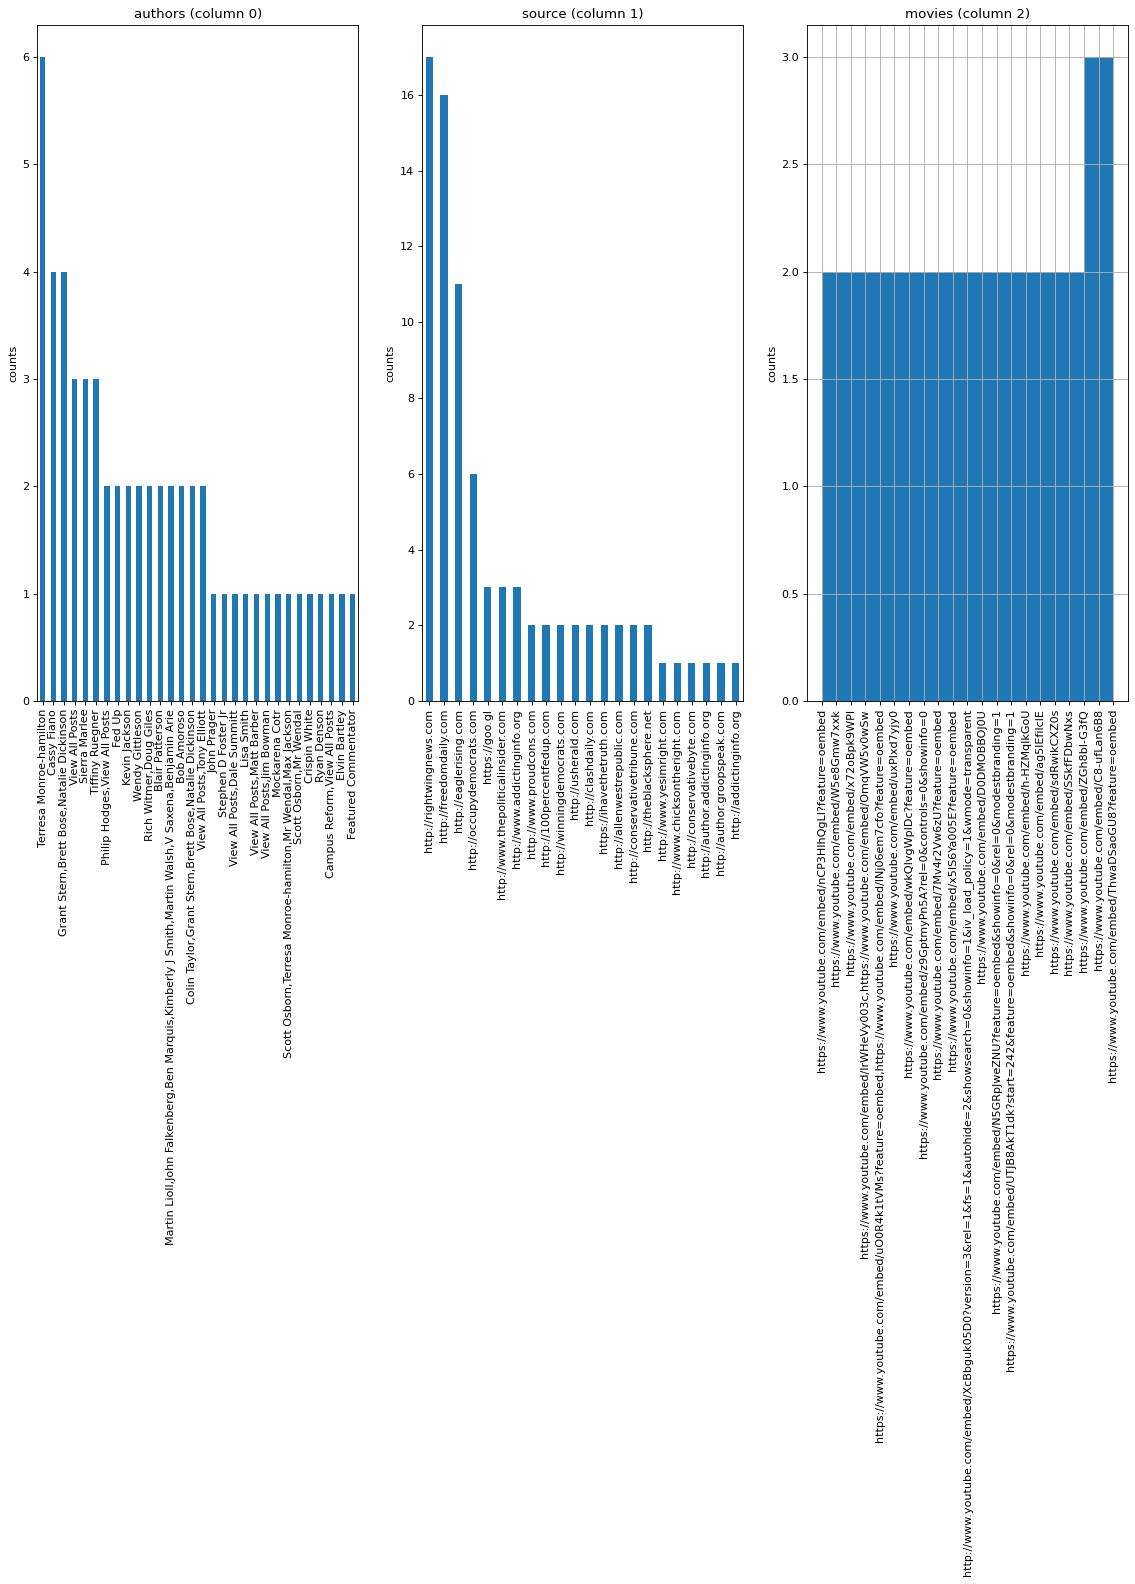

In [18]:
plotPerColumnDistribution(df1, 10, 5)

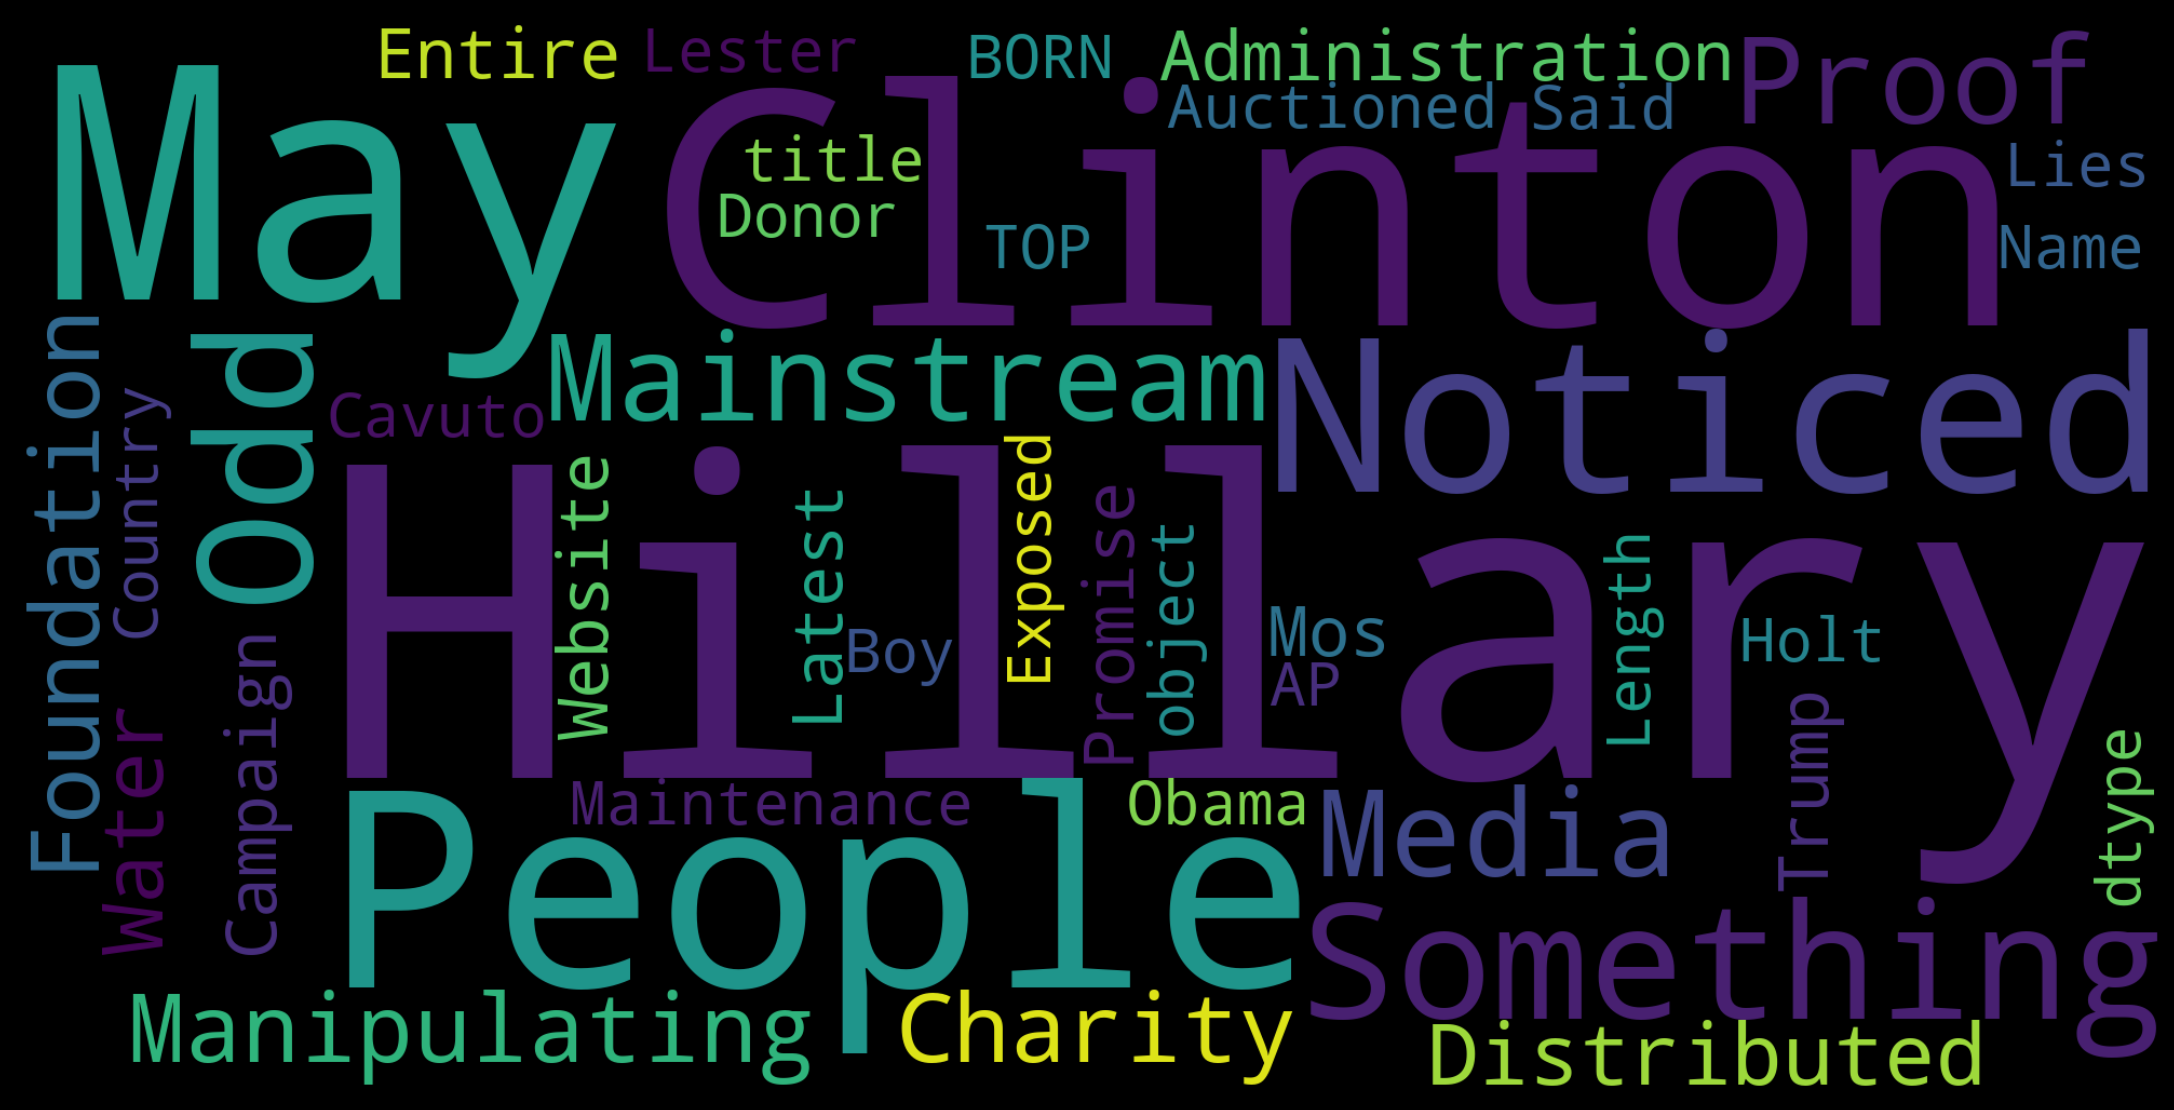

In [27]:
##Code referenced from:
##Title: Simple word cloud in Python
##Url: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df1.title
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Fake News')
plt.tight_layout(pad=0)
plt.show()

In [19]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv(base_path + 'BuzzFeed_real_news_content.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'BuzzFeed_real_news_content.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 91 rows and 12 columns


In [20]:
df2.head(5)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b..."
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws/2dh2NFs,http://a.abcnews.com/images/US/AP_Obama_BM_201...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/president-obama...,"{""fb_title"": ""President Obama Vetoes 9/11 Vict..."


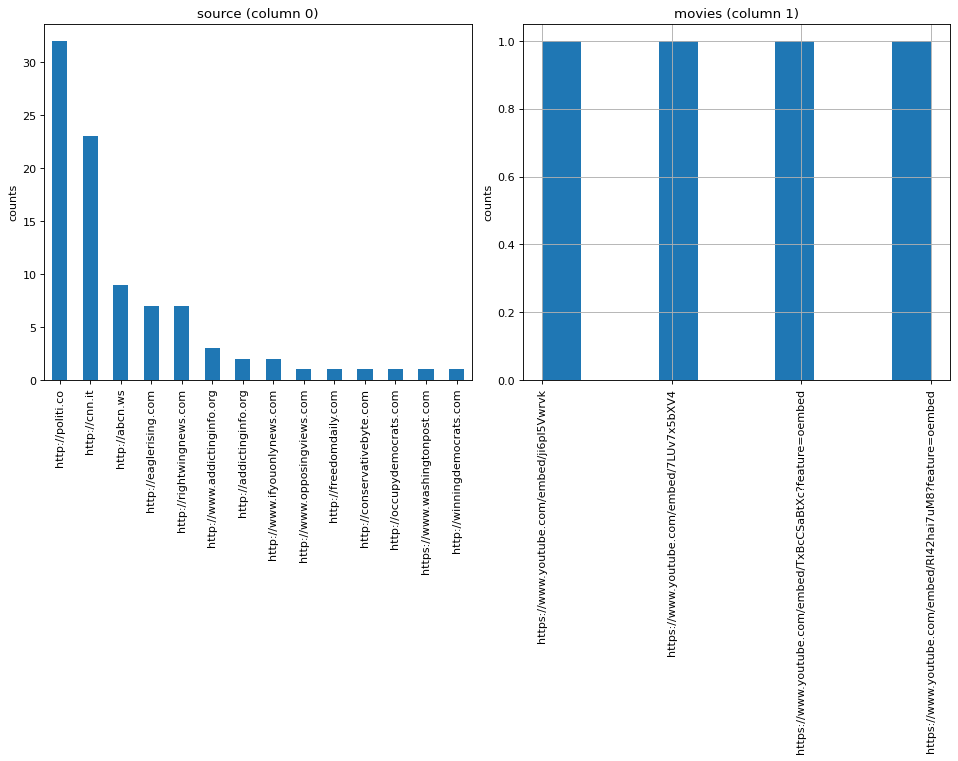

In [21]:
plotPerColumnDistribution(df2, 10, 5)

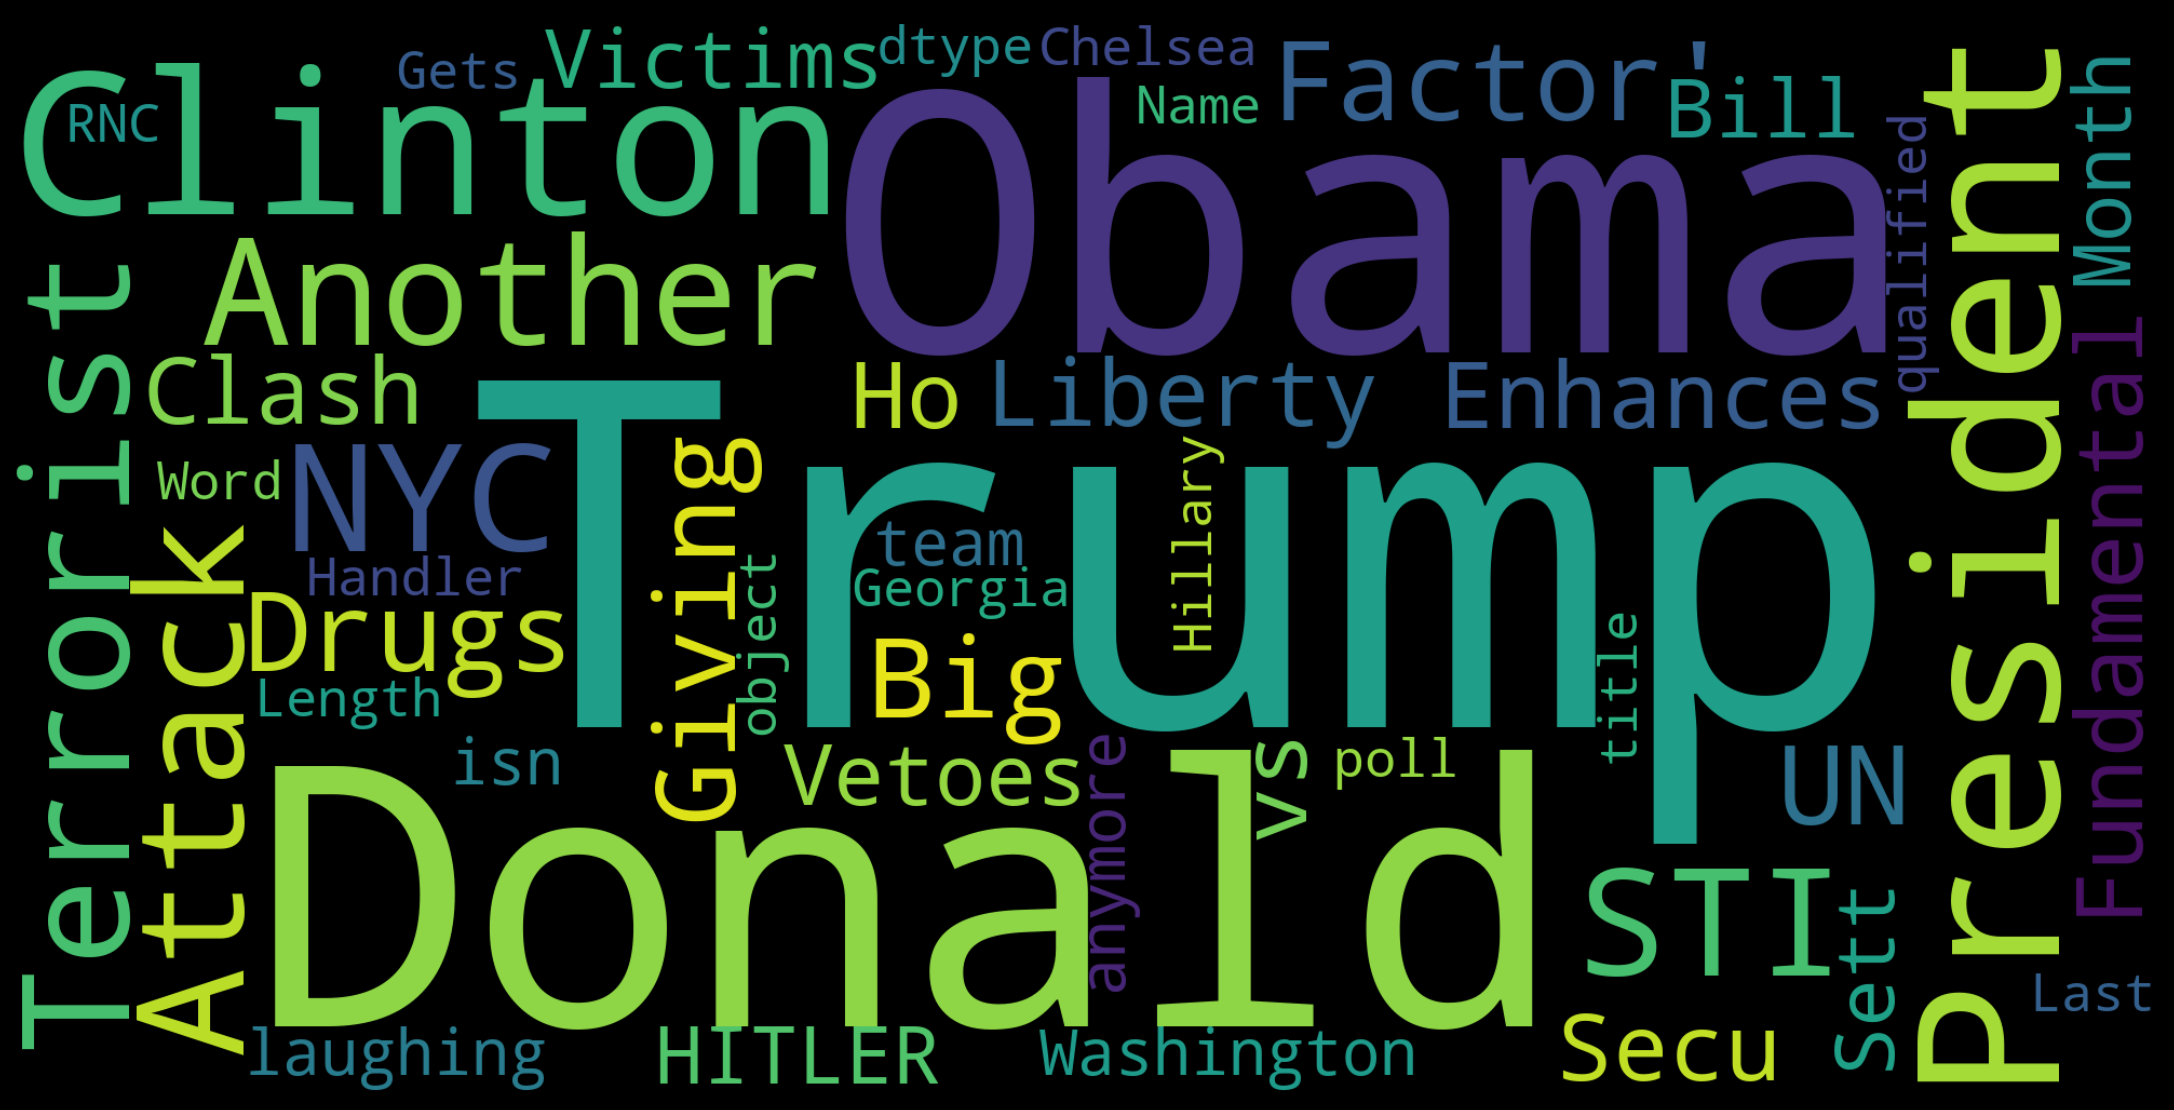

In [ ]:
##Code referenced from:
##Title: Simple word cloud in Python
##Url: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df2.title
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Real News')
plt.tight_layout(pad=0)
plt.show()

In [29]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df3 = pd.read_csv(base_path + 'feature_matrix_bf.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'feature_matrix_bf.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 182 rows and 130 columns


In [30]:
df3.head(5)

,Unnamed: 0,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,...,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,label
0,0,101,2466,11637,6928,2305,6017,1996,2034,1997,2093,14379,2023,2003,2129,2017,2064,3422,2009,2899,1006,13229,1007,18520,7207,1998,6221,8398,2097,2202,1996,2754,6928,2305,2005,1996,2034,4883,5981,1010,...,9020,1996,2824,1010,2097,3677,1996,2034,1997,2093,2236,2602,4883,14379,2012,7570,10343,6494,2118,1999,2047,2259,2006,6928,1010,2244,2656,1012,13229,2097,2250,1996,2724,1999,2049,15700,2006,2049,102,0
1,1,101,2058,1996,2627,2195,2706,1010,1996,2137,2270,2038,2468,6233,5204,1997,1996,5294,7897,2008,2038,2579,2173,2012,1996,7207,3192,2144,18520,7207,2001,3187,1997,2110,1012,2092,1010,1037,2047,3189,...,6349,1006,15775,2072,1007,5500,1523,27129,1011,2091,1524,9820,1013,8387,5850,2000,5022,1999,4942,1011,24505,3088,1010,1998,1523,3497,3445,1524,1996,10831,1997,22822,17062,3012,1998,13356,1010,2429,102,1
2,2,101,2057,1521,2128,7135,1517,7135,1517,2000,4553,2008,13229,1521,1055,13827,2003,2061,1038,20051,4630,1999,2074,2055,2673,2027,2079,1010,2025,3432,1999,7316,1996,2739,1012,2034,2234,14131,12621,1521,...,14405,2063,2006,2037,2219,13827,2007,1037,8554,2008,3475,1521,1056,4276,3259,2009,2001,6267,2006,1012,2429,2000,2037,2695,1011,5981,8554,1010,5786,1003,1997,25094,5393,2008,18520,2180,1996,5981,102,1
3,3,101,2466,11637,27885,13596,2128,10354,27972,2015,2149,8426,2000,3554,18301,8112,5868,1996,3433,2013,4480,1999,2047,2259,1998,2047,3933,2047,2259,1006,13229,1007,2343,13857,8112,2499,2000,5475,4841,1005,...,3933,2058,1996,5353,1012,1998,2002,9720,4841,2000,3582,1996,2599,1997,3901,2182,2011,2025,12040,3436,2000,3571,1012,1000,1045,2228,2009,2003,2590,2000,3342,2054,15554,1998,6355,4654,7913,23738,102,0
4,4,101,3552,10643,2024,2667,2000,9389,1037,3021,2083,1996,2110,4580,2008,2052,2175,2046,3466,3202,2000,3499,14303,28973,2408,1996,2110,2006,2602,2154,1999,2490,1997,6221,8398,1012,2034,3818,1999,2238,...,1012,1999,2060,2616,1010,2009,2052,3423,4697,14303,28973,1012,2004,13962,2415,2005,3425,9517,4205,21025,19646,2378,2409,17678,12083,19341,3041,2023,3204,1010,8554,3422,2545,1010,2926,2216,2040,5630,102,1
